In [21]:
# importing libraries
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# loading data
data=pd.read_csv('/content/drive/MyDrive/sentiment_analysis_data.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [23]:
data.Sentence.values[0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [24]:
#checking null values
data.isnull().sum()
# data shape
data.shape
# checking data types
data.dtypes

Sentence     object
Sentiment    object
dtype: object

In [25]:
# subjectivity function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# polarity function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [26]:
# applying subjectivity and polarity functions
data['Subjectivity']=data.Sentence.apply(getSubjectivity)
data['Polarity']=data.Sentence.apply(getPolarity)

In [27]:
sia=SentimentIntensityAnalyzer()
data['compound']=data.Sentence.apply(lambda x: sia.polarity_scores(x)['compound'])
data['neu']=data.Sentence.apply(lambda x: sia.polarity_scores(x)['neu'])
data['pos']=data.Sentence.apply(lambda x: sia.polarity_scores(x)['pos'])
data['neg']=data.Sentence.apply(lambda x: sia.polarity_scores(x)['neg'])

In [28]:
data

,Sentence,Sentiment,Subjectivity,Polarity,compound,neu,pos,neg
0,The GeoSolutions technology will leverage Bene...,positive,0.588636,0.209091,0.5423,0.847,0.153,0.000
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0.294444,0.022222,-0.2023,0.833,0.000,0.167
2,"For the last quarter of 2010 , Componenta 's n...",positive,0.172917,0.000000,0.1531,0.856,0.080,0.064
3,According to the Finnish-Russian Chamber of Co...,neutral,0.500000,0.062500,0.0000,1.000,0.000,0.000
4,The Swedish buyout firm has sold its remaining...,neutral,0.233333,-0.100000,0.0000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,0.200000,-0.300000,-0.5267,0.761,0.000,0.239
5838,Nordic Walking was first used as a summer trai...,neutral,0.333333,0.250000,0.0000,1.000,0.000,0.000
5839,"According shipping company Viking Line , the E...",neutral,0.437500,0.187500,0.2023,0.870,0.130,0.000
5840,"In the building and home improvement trade , s...",neutral,0.700000,-0.400000,0.4588,0.824,0.176,0.000


In [29]:
data.columns

Index(['Sentence', 'Sentiment', 'Subjectivity', 'Polarity', 'compound', 'neu',
       'pos', 'neg'],
      dtype='object')

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-31-13c5e42fb070>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X=data.groupby('Sentiment').mean()


<Figure size 600x1000 with 0 Axes>

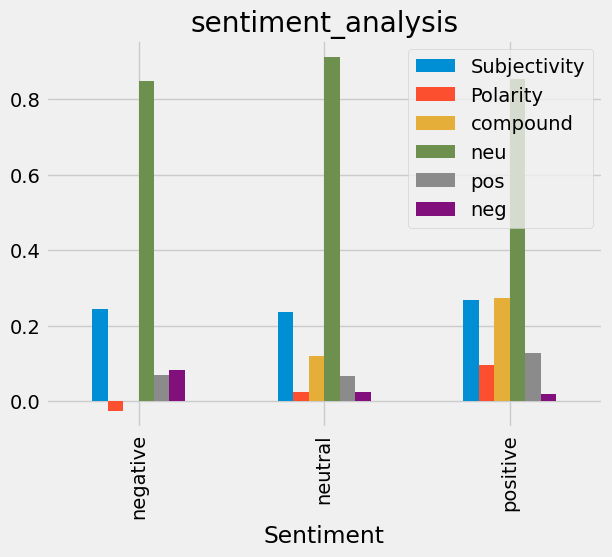

In [31]:
#plotting bar chart
plt.style.use('fivethirtyeight')
X=data.groupby('Sentiment').mean()
plt.figure(figsize=(6,10))
X.plot(kind='bar')
plt.title('sentiment_analysis')
plt.show()

In [32]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']